# test-4

From big test comaprison table with 10 plots

LogCircular 1:100 - point GO

19 dic 2024

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0    5760    5820 2.5429110493e+01 1.6302386256e+00 2.2218827840e+03   
1      1    6519    6669 6.7319452406e+00 4.5706828543e-01 1.3529649194e+03   
2      2   10905   11321 1.5282045391e-01 2.4050830181e-01 8.6109998393e+02   
3      3   24633   25593 2.1262892125e-01 2.1932574560e-01 5.7090446950e+02   
4      4   61929   64190 5.2415192850e-02 7.7375375004e-02 3.8846498125e+02   
5      5  150321  155328 2.7659722600e-03 3.1340891859e-02 2.5002837306e+02   

      std FLUX err          est err   Cons. FLUX err  
0 8.9738275715e+03 2.8746615237e+01 2.4702580900e+02  
1 5.4055641039e+03 1.0213675862e+01 9.5621130000e+01  
2 3.0080408812e+03 3.5768389878e+00 4.2181305000e+01  
3 1.5937872376e+03 1.0938107369e+00 1.9760455000e+01  
4 8.2225772129e+02 5.0920393209e-01 8.6512310000e+00  
5 4.1825454209e+02 2.1231109314e-01 3.5197930000e+00  


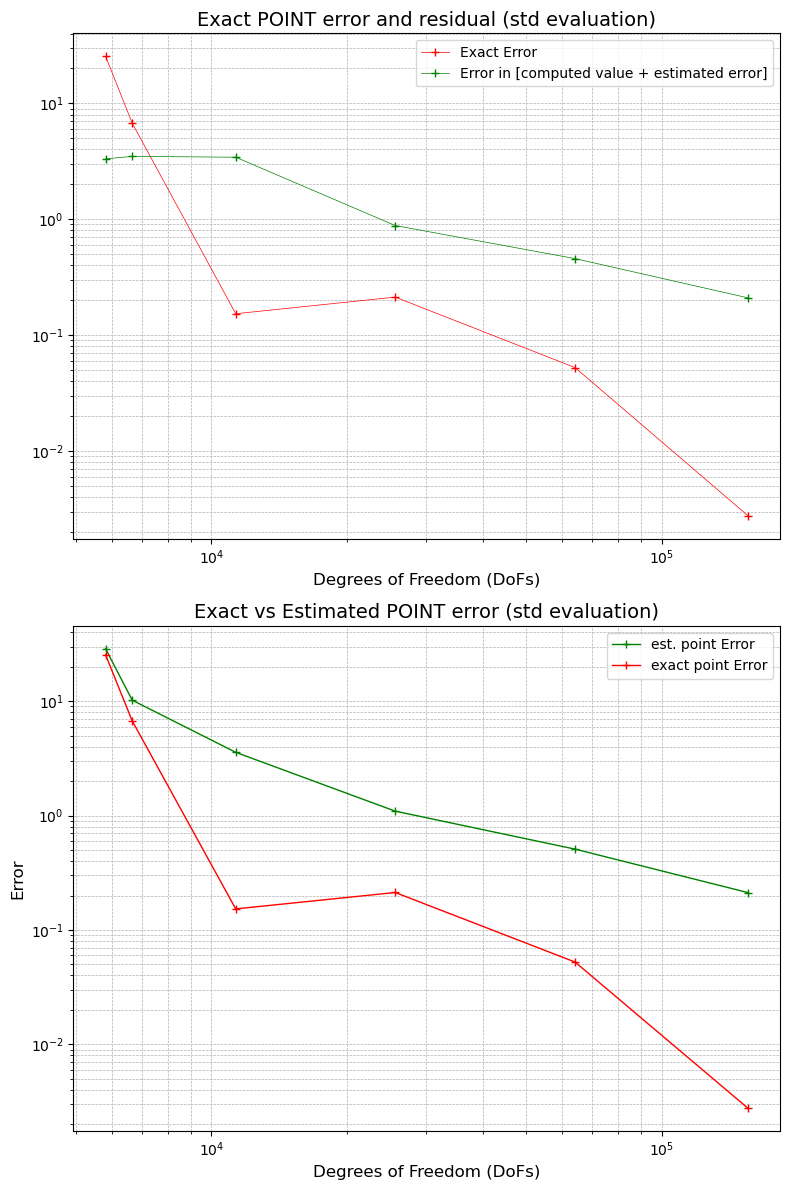

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


# Load the data from the CSV file
file_name = "./results/convergence_results.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
#data['1/N'] = 1 / data['DoFs']
pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
print(data)

# Create the figure
plt.figure(figsize=(8, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 1, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"g-+", linewidth=0.5, label='Error in [computed value + estimated error]')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact POINT error and residual (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='est. point Error')
plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='exact point Error')


plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated POINT error (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
